In [1]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [144]:
data = pd.read_csv("regression_data1.csv")

In [179]:
data=pd.read_csv("classification_data1.csv")

In [2]:
data=pd.read_csv("classification_all_data.csv")

In [3]:
data.columns

Index(['地点', 'read_num_transformed', 'per_cost', 'travel_days', 'photo_num',
       'playmode_万圣节', 'playmode_中秋节', 'playmode_五一', 'playmode_人文',
       'playmode_冬季', 'playmode_古镇', 'playmode_国庆', 'playmode_圣诞',
       'playmode_夏季', 'playmode_婚纱', 'playmode_寒假', 'playmode_徒步',
       'playmode_探险', 'playmode_摄影', 'playmode_春节', 'playmode_暑假',
       'playmode_毕业游', 'playmode_海滨海岛', 'playmode_深度游', 'playmode_清明',
       'playmode_温泉', 'playmode_游轮', 'playmode_滑雪', 'playmode_漫游',
       'playmode_潜水', 'playmode_环游', 'playmode_登山', 'playmode_短途周末',
       'playmode_穷游', 'playmode_端午', 'playmode_第一次', 'playmode_美食',
       'playmode_自驾', 'playmode_蜜月', 'playmode_购物', 'playmode_赏枫',
       'playmode_赏樱', 'playmode_赏秋', 'playmode_跨年', 'playmode_踏春',
       'playmode_骑行', 'person_num_三五好友', 'person_num_亲子', 'person_num_学生',
       'person_num_家庭', 'person_num_情侣', 'person_num_独自一人', 'person_num_闺蜜',
       'dayofweek', 'is_weekend', 'month', 'season', 'title_length', 'z'],
      dtype='obje

{'icoord': [[395.0, 395.0, 405.0, 405.0],
  [385.0, 385.0, 400.0, 400.0],
  [375.0, 375.0, 392.5, 392.5],
  [365.0, 365.0, 383.75, 383.75],
  [355.0, 355.0, 374.375, 374.375],
  [345.0, 345.0, 364.6875, 364.6875],
  [335.0, 335.0, 354.84375, 354.84375],
  [325.0, 325.0, 344.921875, 344.921875],
  [315.0, 315.0, 334.9609375, 334.9609375],
  [305.0, 305.0, 324.98046875, 324.98046875],
  [295.0, 295.0, 314.990234375, 314.990234375],
  [285.0, 285.0, 304.9951171875, 304.9951171875],
  [275.0, 275.0, 294.99755859375, 294.99755859375],
  [265.0, 265.0, 284.998779296875, 284.998779296875],
  [255.0, 255.0, 274.9993896484375, 274.9993896484375],
  [245.0, 245.0, 264.99969482421875, 264.99969482421875],
  [235.0, 235.0, 254.99984741210938, 254.99984741210938],
  [225.0, 225.0, 244.9999237060547, 244.9999237060547],
  [215.0, 215.0, 234.99996185302734, 234.99996185302734],
  [205.0, 205.0, 224.99998092651367, 224.99998092651367],
  [195.0, 195.0, 214.99999046325684, 214.99999046325684],
  [185.0

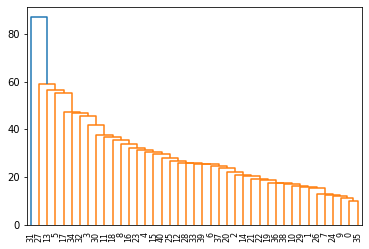

In [4]:
# 给playmode系列变量降维
df1 = data.iloc[:,5:46]
df2 = pd.DataFrame(df1.values.T, index=df1.columns, columns=df1.index)  # 转置数据
df1.sum().describe()
df2=df2[df1.sum()>10]  # 玩法频率太低不具有代表性，应剔除
z = linkage(df2,method="average",metric='euclidean')
dendrogram(z)

In [5]:
index = list(df2.index)
set1 = index[31]
set2 = index 
set2.pop(31)
print(set1,"\n",set2)

playmode_美食 
 ['playmode_万圣节', 'playmode_中秋节', 'playmode_五一', 'playmode_人文', 'playmode_冬季', 'playmode_古镇', 'playmode_国庆', 'playmode_圣诞', 'playmode_夏季', 'playmode_婚纱', 'playmode_寒假', 'playmode_徒步', 'playmode_探险', 'playmode_摄影', 'playmode_春节', 'playmode_暑假', 'playmode_毕业游', 'playmode_海滨海岛', 'playmode_深度游', 'playmode_清明', 'playmode_温泉', 'playmode_游轮', 'playmode_滑雪', 'playmode_漫游', 'playmode_潜水', 'playmode_环游', 'playmode_登山', 'playmode_短途周末', 'playmode_穷游', 'playmode_端午', 'playmode_第一次', 'playmode_自驾', 'playmode_蜜月', 'playmode_购物', 'playmode_赏枫', 'playmode_赏樱', 'playmode_赏秋', 'playmode_跨年', 'playmode_踏春', 'playmode_骑行']


In [6]:
data.loc[:,"playmode1"]=data["playmode_美食"]
df3=df2.drop(df2.index[31])
data.loc[df1[df3.sum()>0].index,"playmode2"]=1
data.loc[df1[df3.sum()==0].index,"playmode2"]=0  # 只要有第二类中的玩法则为1，否则为0
data=data.drop(df1.columns,axis=1)

In [7]:
data.describe()

,read_num_transformed,per_cost,travel_days,photo_num,person_num_三五好友,person_num_亲子,person_num_学生,person_num_家庭,person_num_情侣,person_num_独自一人,person_num_闺蜜,dayofweek,is_weekend,month,season,title_length,z,playmode1,playmode2
count,1.402000e+04,1.402000e+04,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000
mean,1.098931e+04,1.344805e+04,4.166262,102.955706,0.293652,0.081098,0.005849,0.150000,0.162126,0.170899,0.136377,3.242582,0.324608,6.611056,2.460699,14.554208,0.231669,0.545863,0.902710
std,3.195326e+04,9.264888e+05,2.174685,109.794298,0.455451,0.272996,0.076256,0.357084,0.368579,0.376434,0.343200,1.908454,0.468245,3.401179,1.107959,7.230691,0.421914,0.497910,0.296362
min,2.000000e+00,1.020000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.109750e+03,1.000000e+03,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000,1.000000,9.000000,0.000000,0.000000,1.000000
50%,3.919500e+03,2.000000e+03,4.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,7.000000,2.000000,14.000000,0.000000,1.000000,1.000000
75%,8.395000e+03,3.345750e+03,6.000000,134.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,10.000000,3.000000,19.000000,0.000000,1.000000,1.000000
max,1.158000e+06,1.000000e+08,9.000000,1492.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,12.000000,4.000000,44.000000,1.000000,1.000000,1.000000


In [8]:
data=data.drop(["month","season","dayofweek","person_num_学生","地点","read_num_transformed"],axis=1)

In [9]:
data.tail()

,per_cost,travel_days,photo_num,person_num_三五好友,person_num_亲子,person_num_家庭,person_num_情侣,person_num_独自一人,person_num_闺蜜,is_weekend,title_length,z,playmode1,playmode2
14015,2000,8,672,0,0,0,0,1,0,0,28,0.0,1,1.0
14016,2000,4,90,0,0,0,0,1,0,0,30,0.0,0,1.0
14017,1000,3,1,0,0,1,0,0,0,0,14,1.0,0,1.0
14018,188,1,37,1,0,0,0,0,0,1,10,1.0,0,1.0
14019,600,3,11,1,0,0,0,0,0,1,12,0.0,1,1.0


In [11]:
data.to_csv("classification_all_14features.csv",index=False)

In [10]:
df4.sum()

NameError: name 'df4' is not defined

{'icoord': [[55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [25.0, 25.0, 43.75, 43.75],
  [15.0, 15.0, 34.375, 34.375],
  [5.0, 5.0, 24.6875, 24.6875]],
 'dcoord': [[0.0, 10.04987562112089, 10.04987562112089, 0.0],
  [0.0, 14.715838362577491, 14.715838362577491, 10.04987562112089],
  [0.0, 16.77955370471896, 16.77955370471896, 14.715838362577491],
  [0.0, 18.105158067999238, 18.105158067999238, 16.77955370471896],
  [0.0, 19.57022027716161, 19.57022027716161, 18.105158067999238],
  [0.0, 21.945003980023916, 21.945003980023916, 19.57022027716161]],
 'ivl': ['0', '4', '5', '3', '6', '1', '2'],
 'leaves': [0, 4, 5, 3, 6, 1, 2],
 'color_list': ['C1', 'C1', 'C0', 'C0', 'C0', 'C0'],
 'leaves_color_list': ['C0', 'C0', 'C0', 'C0', 'C1', 'C1', 'C1']}

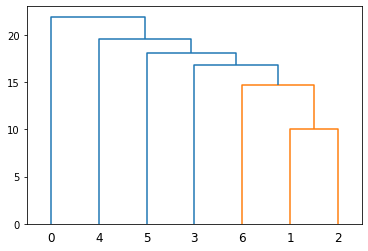

In [88]:
# 给person_num系列变量降维
df4 = data.iloc[:,5:12]
df5 = pd.DataFrame(df4.values.T, index=df4.columns, columns=df4.index)  # 转置数据
z = linkage(df5,method="average",metric='euclidean')
dendrogram(z)

In [70]:
index = list(df2.index)
set1 = index[17]
set2 = index 
set2.pop(17)

22

Text(0, 0.5, 'Inertia')

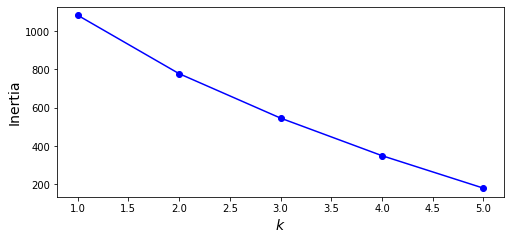

In [89]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=0).fit(df5) for k in range(1, 6)]
inertias = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 6), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)